In [1]:
from rna2d.pipelines import Pipeline
%load_ext autoreload

In [58]:
%autoreload
p = Pipeline("/data/2d-rna/validation-noncanon-non0/results.rpt")
methods, indeces = p.run_for_all()

In [59]:
%autoreload
nm, ci = p.filter_by_molecules(methods, indeces, "../metadata/representants.txt")

In [60]:
with open("../metadata/representants.txt") as f:
    repres = f.readlines()

repres = [r.strip() for r in repres]
print(f'All representants: {len(repres)}')
repres = [r for r in repres if '-' not in r]
print(f'Single-strand only: {len(repres)}')


All representants: 1646
Single-strand only: 1254


Remove SPOT-RNA training set sequences

In [61]:
import os
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
def get_pdb_ids(path):
    pdbs = os.listdir(path)
    pdbs = [p.replace("-", "_") for p in pdbs]
    pdbs = [f'{p[:4].upper()}{p[4:]}' for p in pdbs]
    return pdbs

trpdbs = get_pdb_ids(train_pdbs)
print(trpdbs[:10])
print(f'Training set pdbs: {len(trpdbs)}')
removed = set(repres).intersection(set(trpdbs))
repres = set(repres).difference(set(trpdbs))
print(f'Removed pdbs: {len(removed)}')
print(f'Representants after filtering: {len(repres)}')


['3SKI_1_A', '2HVY_1_E', '4PMI_1_A', '1FFK_1_9', '2CSX_1_C', '2ZNI_1_C', '4Y1J_1_A', '4KZD_1_R', '4V83_1_AV', '2A64_1_A']
Training set pdbs: 120
Removed pdbs: 57
Representants after filtering: 1197


In [62]:
import pandas as pd
tool = 'spot-rna'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
df = pd.DataFrame(methods[tool], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[tool])
res = df.loc[common_ind]
x = df.loc[df['INF']>0.9].head(100).tail()
print(
    f"All indeces: {len(indeces[tool])}, Representants: {len(repres)}, Intersection: {len(common_ind)}")
print(f"Before filtering: {df['INF'].mean()}")
print(f"After filtering: {res['INF'].mean()}")
print(x)


All indeces: 6625, Representants: 1197, Intersection: 447
Before filtering: 0.2549655849056598
After filtering: 0.22005145413870256
            PPV  TPR   F1  INF
4V83_1_AV   1.0  1.0  1.0  1.0
4V83_1_CV   1.0  1.0  1.0  1.0
4WZM_1_B-C  1.0  1.0  1.0  1.0
4X4U_1_B    1.0  1.0  1.0  1.0
4X4V_1_D    1.0  1.0  1.0  1.0


In [63]:
%autoreload
from rna2d.utils import get_names
tool = 'spot-rna'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
print(f'Common ids: {len(common_ind)}')
res = {}
for k in get_names():
    df = pd.DataFrame(methods[k], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[k])
    res[k] =  df.loc[common_ind]

Common ids: 447


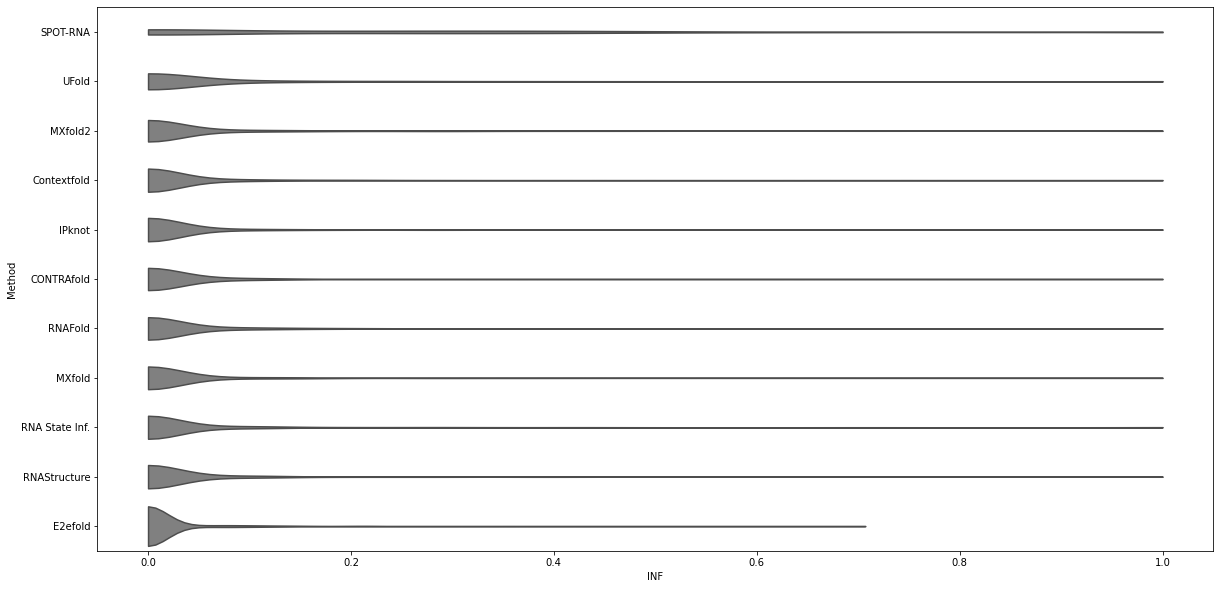

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.utils import get_sns_data, get_means_stds, get_DataFrames

%autoreload
means, stds, dfs = get_means_stds(res, indeces)
dfmeans, dfstds = get_DataFrames(means, stds, name='nwc')

d = get_sns_data(res, dfmeans, get_names())

fig, axs = plt.subplots(1, figsize=(20, 10))
ax = sns.violinplot(x='INF', y='Method', inner=None, color='grey', data=d, ax=axs, cut=0)

In [65]:
dfmeans

,PPV,TPR,F1,INF
spot-rna,0.18,0.27,0.21,0.22
ufold,0.04,0.07,0.05,0.05
mxfold2,0.03,0.05,0.03,0.03
contextFold,0.02,0.04,0.03,0.03
ipknot,0.02,0.04,0.03,0.03
contrafold,0.03,0.04,0.03,0.03
rnafold,0.03,0.04,0.03,0.03
mxfold,0.02,0.04,0.03,0.03
rna-state-inf,0.02,0.04,0.03,0.03
rna-structure,0.02,0.04,0.03,0.03


In [66]:
dfstds

,PPV,TPR,F1,INF
spot-rna,0.24,0.31,0.26,0.26
ufold,0.10,0.14,0.11,0.11
mxfold2,0.13,0.18,0.14,0.15
contextFold,0.10,0.14,0.10,0.11
ipknot,0.10,0.13,0.11,0.11
contrafold,0.10,0.13,0.11,0.11
rnafold,0.10,0.13,0.11,0.11
mxfold,0.10,0.14,0.11,0.11
rna-state-inf,0.10,0.13,0.10,0.11
rna-structure,0.10,0.13,0.10,0.11


Sequence Length analysis

In [11]:
p = '/data/2d-rna/dbn-cifs/'
leng_pdb = []
for fi in common_ind:
    with open(os.path.join(p, f'{fi}.dbn')) as f:
        line_leng = len(f.readlines()[-1])
        leng_pdb.append(line_leng)

(array([102.,  78.,  61., 118.,  33.,  31.,  10.,   4.,   4.,   3.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 11.,  30.,  49.,  68.,  87., 106., 125., 144., 163., 182., 201.,
        220., 239., 258., 277., 296., 315., 334., 353., 372., 391.]),
 <a list of 20 Patch objects>)

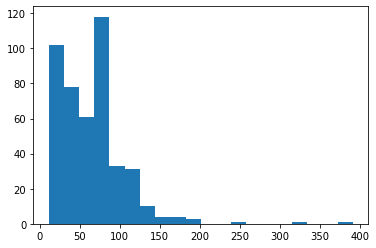

In [12]:
import numpy as np

arr = np.array(leng_pdb)
arr = arr[arr<500]
plt.hist(arr, bins=20)